<a href="https://colab.research.google.com/github/Riddhiman-1098/-Data-Analysis--Python/blob/main/Project_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [98]:

url='https://drive.google.com/file/d/1lBowvJbK5lIZntCs_-sMElyO3JJQWNHk/view?usp=drive_link'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)
#print(df.head())


In [99]:
print(df.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2010 00:10:00    967.56     -2.84    272.89        -3.41    95.8   
1  01.01.2010 00:20:00    967.45     -2.85    272.88        -3.43    95.7   
2  01.01.2010 00:30:00    967.45     -2.88    272.85        -3.46    95.8   
3  01.01.2010 00:40:00    967.34     -2.90    272.84        -3.47    95.8   
4  01.01.2010 00:50:00    967.29     -2.96    272.78        -3.53    95.8   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  ...  wv (m/s)  \
0          4.95          4.75          0.21       3.06  ...      1.61   
1          4.95          4.74          0.21       3.05  ...      2.00   
2          4.94          4.73          0.21       3.05  ...      2.25   
3          4.93          4.72          0.21       3.04  ...      2.64   
4          4.91          4.70          0.21       3.03  ...      2.82   

   max. wv (m/s)  wd (deg)  rain (mm)  raining (s)  SWDR (W/m�)  \
0           2.76     15.41     

In [100]:



df['T_(degC)'] = df['T (degC)']


print(df.head())


             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2010 00:10:00    967.56     -2.84    272.89        -3.41    95.8   
1  01.01.2010 00:20:00    967.45     -2.85    272.88        -3.43    95.7   
2  01.01.2010 00:30:00    967.45     -2.88    272.85        -3.46    95.8   
3  01.01.2010 00:40:00    967.34     -2.90    272.84        -3.47    95.8   
4  01.01.2010 00:50:00    967.29     -2.96    272.78        -3.53    95.8   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  ...  max. wv (m/s)  \
0          4.95          4.75          0.21       3.06  ...           2.76   
1          4.95          4.74          0.21       3.05  ...           3.10   
2          4.94          4.73          0.21       3.05  ...           3.79   
3          4.93          4.72          0.21       3.04  ...           3.77   
4          4.91          4.70          0.21       3.03  ...           4.29   

   wd (deg)  rain (mm)  raining (s)  SWDR (W/m�)  PAR (�mol/m�/s)  \

**DATA CLEANSING**

**Data Inspection**: Begin by inspecting the dataset to understand its structure, features, and any potential issues. This involves examining the data types of each column, checking for missing values, outliers, and inconsistencies.



In [101]:
print(df.head())  # Display the first few rows
print(df.info())  # Summary of the DataFrame

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2010 00:10:00    967.56     -2.84    272.89        -3.41    95.8   
1  01.01.2010 00:20:00    967.45     -2.85    272.88        -3.43    95.7   
2  01.01.2010 00:30:00    967.45     -2.88    272.85        -3.46    95.8   
3  01.01.2010 00:40:00    967.34     -2.90    272.84        -3.47    95.8   
4  01.01.2010 00:50:00    967.29     -2.96    272.78        -3.53    95.8   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  ...  max. wv (m/s)  \
0          4.95          4.75          0.21       3.06  ...           2.76   
1          4.95          4.74          0.21       3.05  ...           3.10   
2          4.94          4.73          0.21       3.05  ...           3.79   
3          4.93          4.72          0.21       3.04  ...           3.77   
4          4.91          4.70          0.21       3.03  ...           4.29   

   wd (deg)  rain (mm)  raining (s)  SWDR (W/m�)  PAR (�mol/m�/s)  \

**Handling Missing Values:** Missing values are common in datasets and can arise due to various reasons such as data entry errors, equipment malfunction, or intentional omission. Decide how to handle missing values based on the context of the data and the impact of missingness on the analysis. Common strategies include:

Removing rows or columns with missing values.
Imputing missing values using statistical measures such as mean, median, or mode.
Predictive imputation methods such as regression or k-nearest neighbors.

In [102]:
print("Number of missing values per column:")
print(df.isnull().sum())  # Check for missing values

Number of missing values per column:
Date Time               0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m�)             0
PAR (�mol/m�/s)         0
max. PAR (�mol/m�/s)    0
Tlog (degC)             0
CO2 (ppm)               0
T_(degC)                0
dtype: int64


**Dealing with Duplicates:** Duplicates can skew analysis results and lead to biased insights. Identify and remove duplicate rows from the dataset, keeping only the unique records.

In [103]:
print("Number of duplicate rows:", df.duplicated().sum())  # Check for duplicates

Number of duplicate rows: 334


In [104]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

**Correcting Data Errors:** Data errors can manifest in various forms such as spelling mistakes, incorrect formatting, or inconsistencies. Some common techniques to correct data errors include:

Standardizing formats (e.g., converting text to lowercase, removing leading/trailing spaces).
Using domain knowledge or external references to validate and correct erroneous data.
Applying data transformation techniques (e.g., scaling, normalization) to ensure consistency across features.

Example: Convert 'Gender' column to lowercase
df['Gender'] = df['Gender'].str.lower()

In [105]:
df["T_(degC)"].mean()

9.860449314826488

In [106]:
df.groupby("T_(degC)").min()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),CO2 (ppm)
T_(degC),,,,,,,,,,,,,,,,,,,,,
-21.04,07.02.2012 03:20:00,1008.90,-21.04,251.48,-23.37,81.30,1.13,0.92,0.21,0.57,...,0.61,0.88,226.20,0.0,0,0.00,0.00,0.00,10.26,431.1
-20.94,07.02.2012 03:10:00,1009.09,-20.94,251.57,-23.39,80.40,1.14,0.92,0.22,0.57,...,0.72,1.04,209.30,0.0,0,0.00,0.00,0.00,11.06,428.4
-20.80,07.02.2012 03:00:00,1008.96,-20.80,251.70,-23.19,80.90,1.16,0.93,0.22,0.58,...,0.33,0.68,205.90,0.0,0,0.00,0.00,0.00,9.94,423.4
-20.79,03.02.2012 07:10:00,1006.44,-20.79,251.91,-22.81,83.60,1.16,0.97,0.19,0.60,...,0.81,1.28,166.10,0.0,0,0.00,0.00,0.00,9.89,452.0
-20.74,07.02.2012 03:50:00,1008.72,-20.74,251.77,-23.18,80.50,1.16,0.94,0.22,0.58,...,0.38,0.72,36.35,0.0,0,0.00,0.00,0.00,10.29,439.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.01,05.07.2015 15:50:00,986.91,37.01,311.34,15.21,27.55,62.85,17.31,45.53,10.98,...,0.85,1.88,291.20,0.0,0,420.12,833.20,1245.95,50.01,-9999.0
37.09,04.07.2015 16:20:00,991.32,37.09,311.02,15.57,28.06,63.12,17.71,45.41,11.19,...,2.82,5.44,151.60,0.0,0,499.20,991.31,1017.18,50.44,-9999.0
37.10,04.07.2015 16:30:00,991.22,37.10,311.04,15.59,28.09,63.15,17.74,45.41,11.21,...,2.29,4.40,176.80,0.0,0,461.57,908.88,945.56,50.47,-9999.0


**Datetime** **format**

In [107]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format= "%d.%m.%Y %H:%M:%S")

In [108]:
df['Date Time'].dtypes

dtype('<M8[ns]')

Seperate date and time. Copying the date into a new column **Date_column**

In [109]:
df['date_column'] = df['Date Time'].dt.date

print(df)

                 Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0      2010-01-01 00:10:00    967.56     -2.84    272.89        -3.41    95.8   
1      2010-01-01 00:20:00    967.45     -2.85    272.88        -3.43    95.7   
2      2010-01-01 00:30:00    967.45     -2.88    272.85        -3.46    95.8   
3      2010-01-01 00:40:00    967.34     -2.90    272.84        -3.47    95.8   
4      2010-01-01 00:50:00    967.29     -2.96    272.78        -3.53    95.8   
...                    ...       ...       ...       ...          ...     ...   
656951 2022-06-30 23:20:00    984.33     22.00    296.49        19.85    87.6   
656952 2022-06-30 23:30:00    984.20     21.92    296.42        19.91    88.4   
656953 2022-06-30 23:40:00    984.18     21.77    296.27        19.84    88.8   
656954 2022-06-30 23:50:00    984.24     21.67    296.16        19.83    89.3   
656955 2022-07-01 00:00:00    984.27     22.20    296.69        19.73    85.9   

        VPmax (mbar)  VPact

**Humidity Analysis**: Analyze the relationship between temperature and relative humidity (rh %) to understand patterns or trends. You can also predict humidity levels based on temperature.

In [110]:
correlation = df['T (degC)'].corr(df['rh (%)'])
print("Correlation between temperature and humidity:", correlation)

Correlation between temperature and humidity: -0.5696832813730187


**Dew Point Analysis:** Investigate the relationship between dew point temperature (Tdew) and relative humidity to assess **moisture levels** in the air and potential for condensation or fog.

In [111]:

# Function to calculate dew point
def calculate_dew_point(temp, rh):
    return temp - ((100 - rh) / 5)

# Apply the function to calculate dew point and add it to the DataFrame
df['Dew Point (degC)'] = calculate_dew_point(df['T (degC)'], df['rh (%)'])

# Display the DataFrame with Dew Point column added
print(df)

                 Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0      2010-01-01 00:10:00    967.56     -2.84    272.89        -3.41    95.8   
1      2010-01-01 00:20:00    967.45     -2.85    272.88        -3.43    95.7   
2      2010-01-01 00:30:00    967.45     -2.88    272.85        -3.46    95.8   
3      2010-01-01 00:40:00    967.34     -2.90    272.84        -3.47    95.8   
4      2010-01-01 00:50:00    967.29     -2.96    272.78        -3.53    95.8   
...                    ...       ...       ...       ...          ...     ...   
656951 2022-06-30 23:20:00    984.33     22.00    296.49        19.85    87.6   
656952 2022-06-30 23:30:00    984.20     21.92    296.42        19.91    88.4   
656953 2022-06-30 23:40:00    984.18     21.77    296.27        19.84    88.8   
656954 2022-06-30 23:50:00    984.24     21.67    296.16        19.83    89.3   
656955 2022-07-01 00:00:00    984.27     22.20    296.69        19.73    85.9   

        VPmax (mbar)  VPact

**Weather Pattern Identification:**

1. Analyze wind direction and speed
2. You can visualize wind direction using a compass rose plot
3. Analyze atmospheric pressure for patterns (e.g., using moving averages or Fourier transform

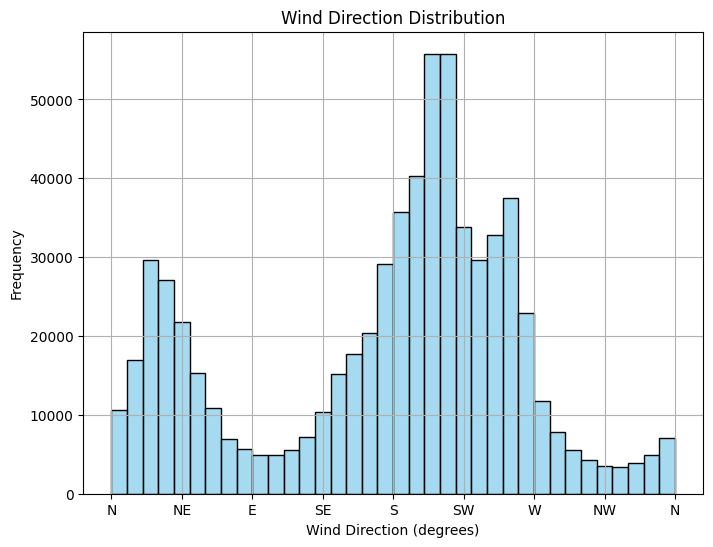

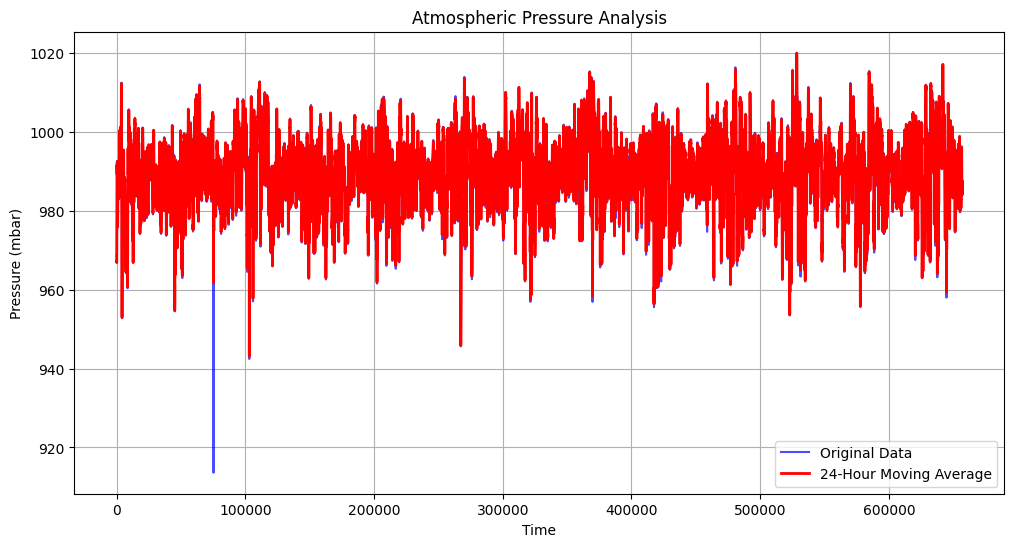

In [112]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

# Visualize wind direction using a compass rose plot
plt.figure(figsize=(8, 6))
sns.histplot(df['wd (deg)'], bins=36, kde=False, color='skyblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.xticks(range(0, 361, 45), ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
plt.grid(True)
plt.show()

# Analyze atmospheric pressure for patterns using moving averages
plt.figure(figsize=(12, 6))
df['p (mbar)'].plot(color='blue', alpha=0.7, label='Original Data')
df['p (mbar)'].rolling(window=24).mean().plot(color='red', linewidth=2, label='24-Hour Moving Average')
plt.title('Atmospheric Pressure Analysis')
plt.xlabel('Time')
plt.ylabel('Pressure (mbar)')
plt.legend()
plt.grid(True)
plt.show()

**CO2 Analysis:**

1. Visualize trends in CO2 concentration over time
2. Analyze correlations between CO2 levels and other variables (e.g., temperature, humidity)

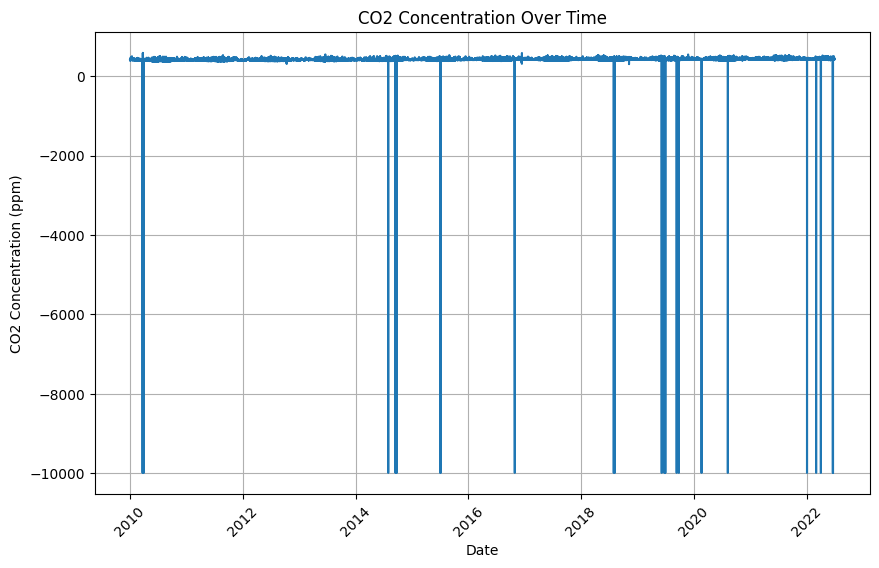

In [132]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

# Visualize trends in CO2 concentration over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date Time', y='CO2 (ppm)', data=df)
plt.title('CO2 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



**Time Series Analysis:**

1. Plot time series for each variable
2. Analyze trends, seasonal patterns, and identify any anomalies or outliers

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extracting useful features from the date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#df['DayOfWeek'] = df['Date'].dt.dayofweek

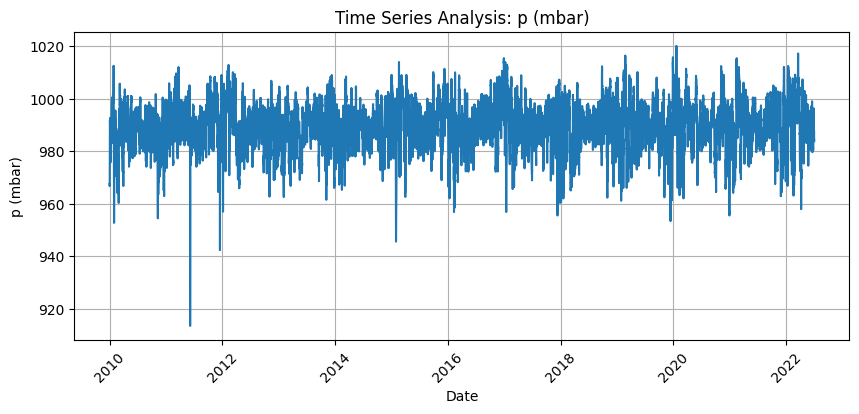

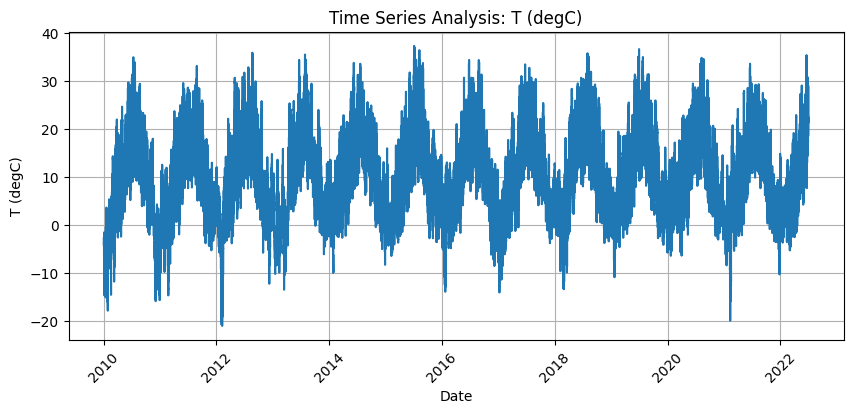

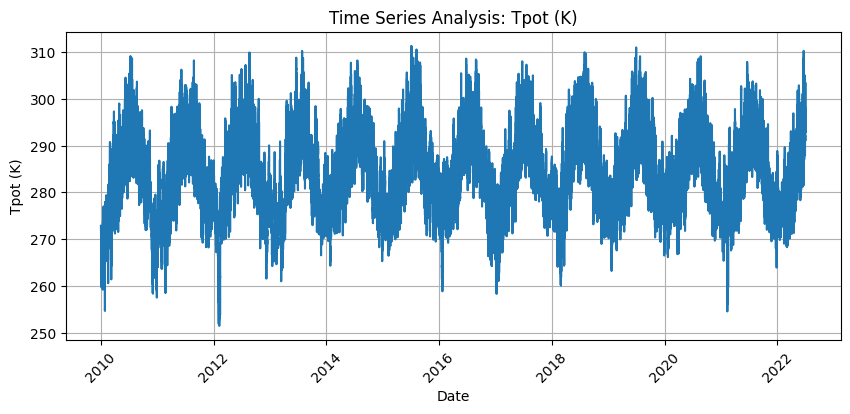

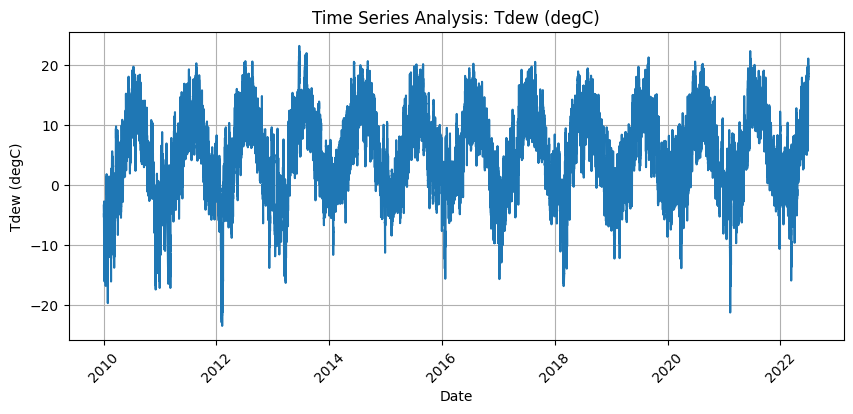

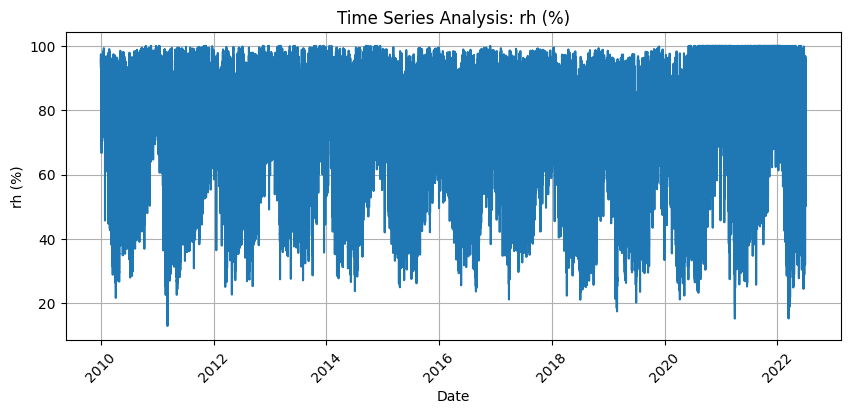

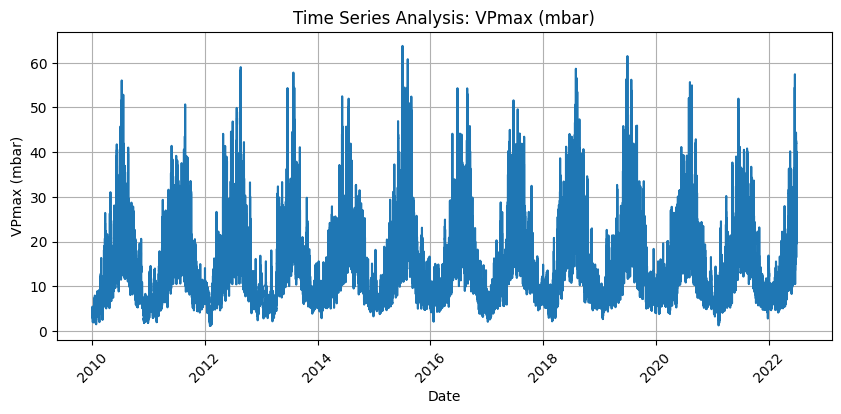

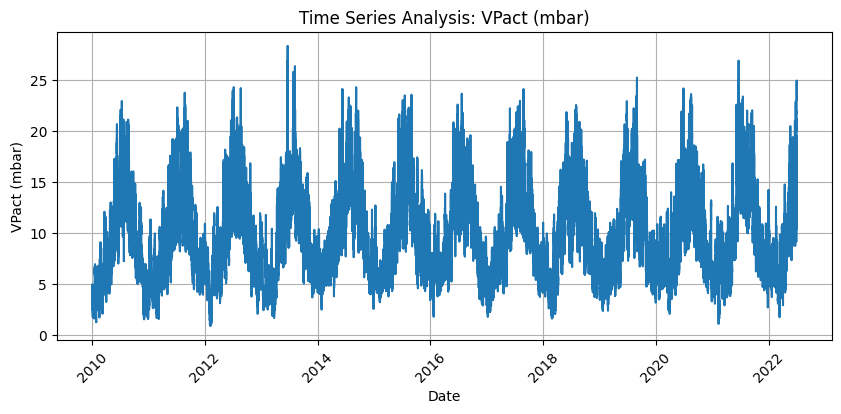

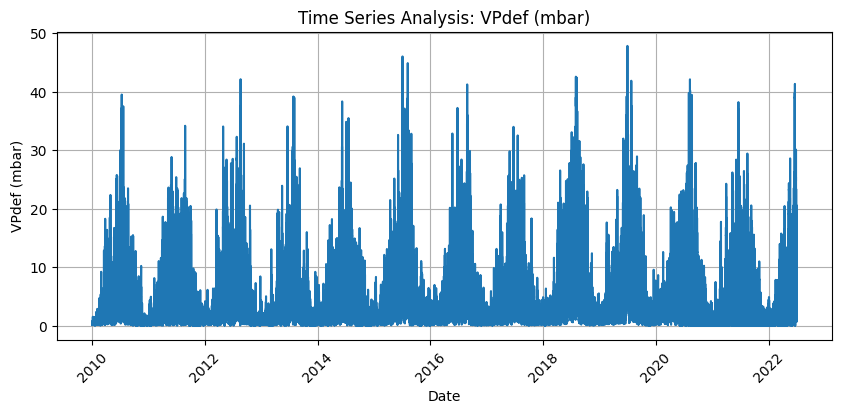

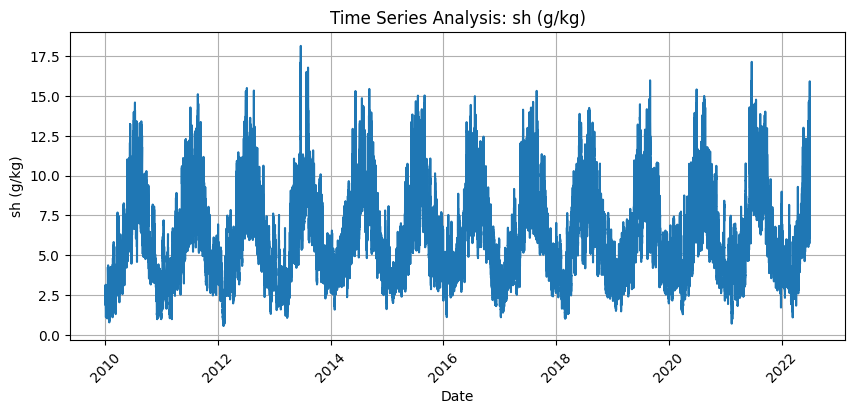

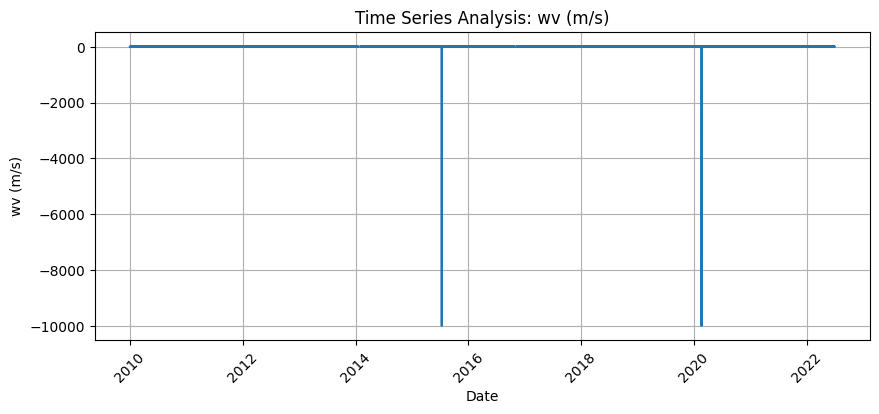

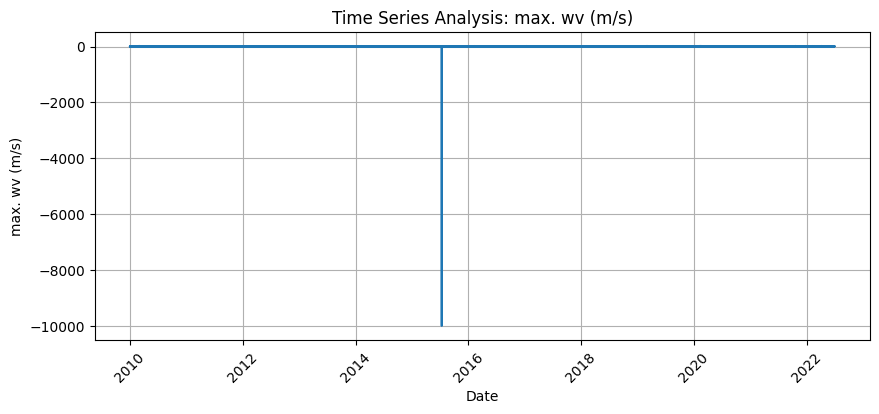

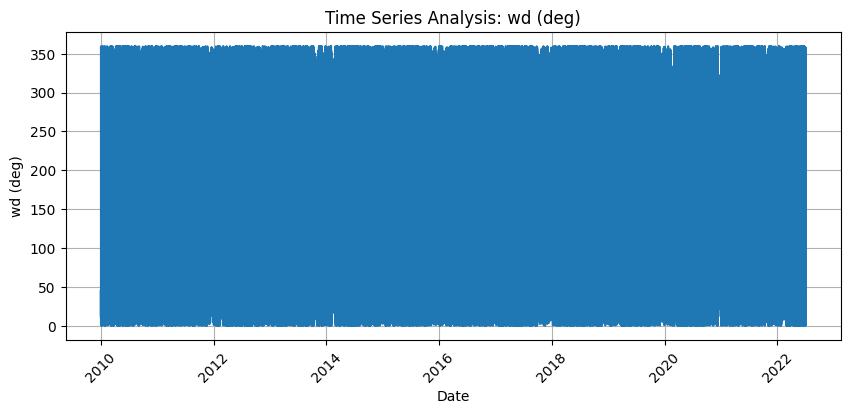

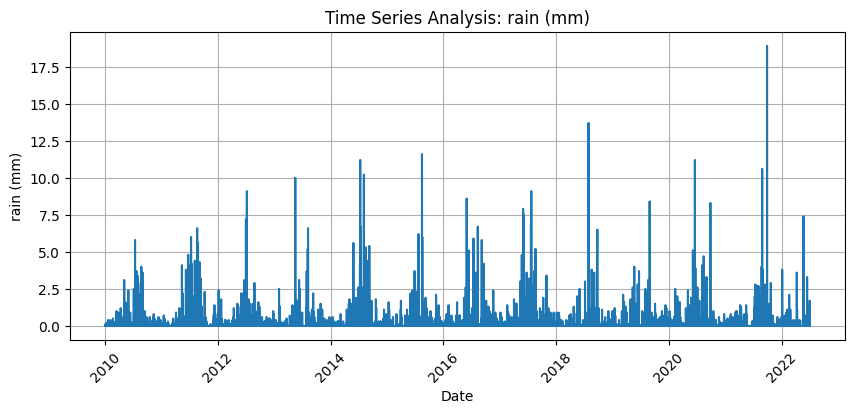

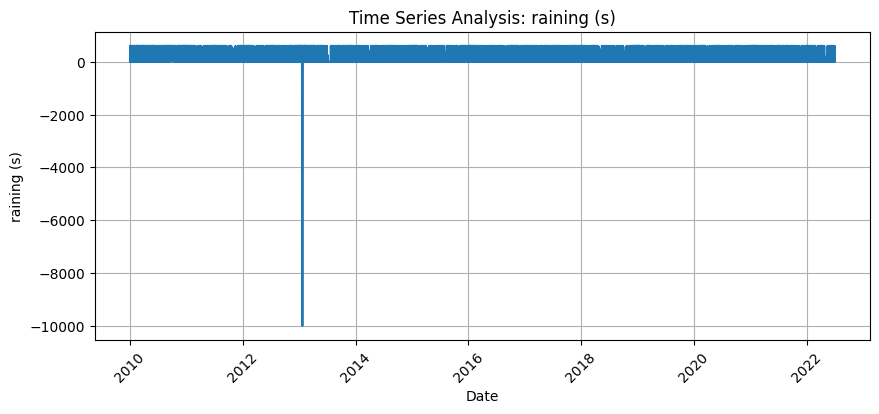

ValueError: Could not interpret value `SWDR (W/m²)` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x400 with 0 Axes>

In [135]:
variables = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)',
             'VPdef (mbar)', 'sh (g/kg)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'rain (mm)', 'raining (s)',
             'SWDR (W/m²)', 'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)']

for variable in variables:
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='Date Time', y=variable, data=df)
    plt.title(f'Time Series Analysis: {variable}')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

**Temperature Prediction:** Using the historical temperature data, you can build a predictive model to forecast future temperatures. Techniques like linear regression, ARIMA, or machine learning algorithms such as random forests or neural networks can be applied.

In [113]:
df['Date Time'] = df['Date Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [114]:
df['Date Time'].dtypes

dtype('O')

In [115]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

# Extract date component and convert to string
df['Date'] = df['Date Time'].dt.date.astype(str)

# Extract time component and convert to string
df['Time'] = df['Date Time'].dt.time.astype(str)

print(df)

                 Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0      2010-01-01 00:10:00    967.56     -2.84    272.89        -3.41    95.8   
1      2010-01-01 00:20:00    967.45     -2.85    272.88        -3.43    95.7   
2      2010-01-01 00:30:00    967.45     -2.88    272.85        -3.46    95.8   
3      2010-01-01 00:40:00    967.34     -2.90    272.84        -3.47    95.8   
4      2010-01-01 00:50:00    967.29     -2.96    272.78        -3.53    95.8   
...                    ...       ...       ...       ...          ...     ...   
656951 2022-06-30 23:20:00    984.33     22.00    296.49        19.85    87.6   
656952 2022-06-30 23:30:00    984.20     21.92    296.42        19.91    88.4   
656953 2022-06-30 23:40:00    984.18     21.77    296.27        19.84    88.8   
656954 2022-06-30 23:50:00    984.24     21.67    296.16        19.83    89.3   
656955 2022-07-01 00:00:00    984.27     22.20    296.69        19.73    85.9   

        VPmax (mbar)  VPact

In [116]:
df['Date'] = pd.to_datetime(df['Date'])

# Extracting useful features from the date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#df['DayOfWeek'] = df['Date'].dt.dayofweek

In [117]:
X = df[['Year', 'Month', 'Day']]  # Features other than temperature
y = df['T (degC)']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting temperatures
predictions = model.predict(X_test)

In [118]:
predictions

array([ 9.24326989,  6.83989236,  9.36871854, ..., 10.8743465 ,
        8.31833533, 12.64626786])

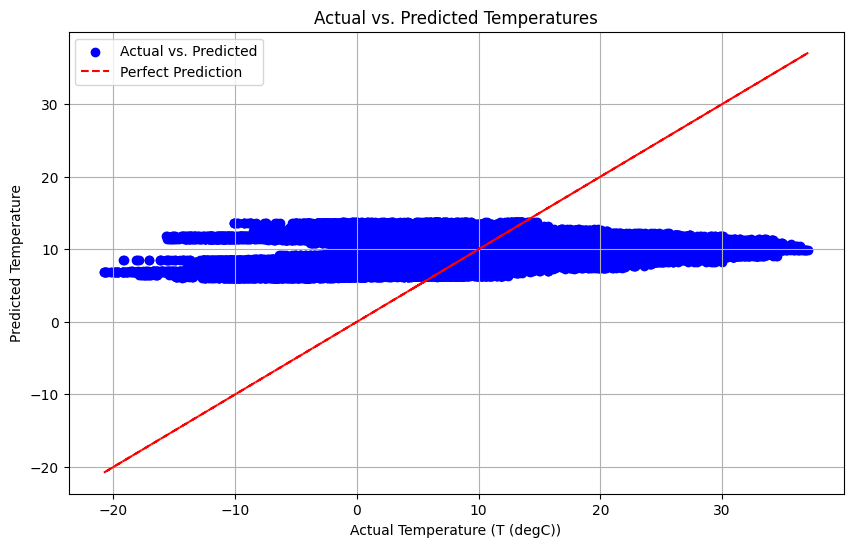

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature (T (degC))')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

**Prediction** on a Specific **Date**

In [121]:

# Create a DataFrame for the date '2023-02-10'
date_to_predict = pd.DataFrame({'Year': [2023], 'Month': [2], 'Day': [10]})

# Predict temperature for the given date
predicted_temperature = model.predict(date_to_predict)

print("Predicted temperature for 2023-02-10:", predicted_temperature[0])


Predicted temperature for 2023-02-10: 8.829081884361699


In [122]:


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 6.630409672682763
Mean Squared Error: 65.59426039871693
R-squared: 0.04517259655659367


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 6.630409672682763
Mean Squared Error: 65.59426039871693
Root Mean Squared Error: 8.099028361397243


In [125]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, predictions)

print("R-squared:", r2)

R-squared: 0.04517259655659367


**Rainfall Prediction:**

1. Build a predictive model using historical rainfall data
2. Techniques: regression, time series forecasting, or machine learning algorithms

Mean Squared Error: 0.010058078536303267
R-squared: 0.01441488108740463


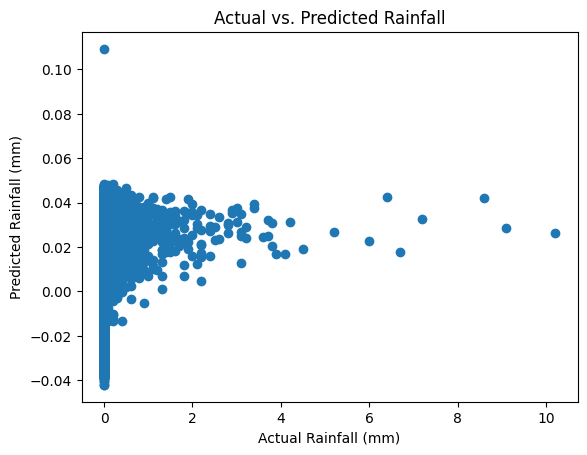

In [126]:
# Select relevant features and target variable
X = df[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)']]  # Features
y = df['rain (mm)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize actual vs. predicted rainfall
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.title('Actual vs. Predicted Rainfall')
plt.show()